<a href="https://colab.research.google.com/github/ian-byrne/MADSmilestone2/blob/main/Model_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create the datasets for model training, validation and testing

In this notebook we will load in the the dataframes created from Cleaning_Labeling notebook to help create our balanced datasets for Supervised Learning and Unsupervised Learning. 

### Steps:
- Load in csv data
- Create dictionaries to map round, ID and labels to the image data stored in the S3 bucket clockimages.
- Split the data in Train, Validation and Test datasets
- Balance the final training datasets

### Outputs:
  #### Dictionaries:
  ***Dictionaries that ultimately <u>WERE NOT</u> used in creating the final datasets for model input:***

- A dictionary utilizing the AI Crowd dementia labeling system that consists of the Rounds, SPIDs, and dementia labels 0 - 2. 
  - ***roundIdLabelDict.txt*** - Ultimately, this dictionary was not used in creating the final datasets for model input. 
- A dictionary utilizing the hybrid AI Crowd and NHATs combined labeling system that consists of Rounds, SPIDs, and labels 0-2.
  - ***customLabelDict.txt*** - Ultimately, this dictionary was not used in creating the final datasets for model input. 
- A dictionary using data from the cleaned_nhat_data.csv using data from columns 'round', 'spid' and 'cg1dclkdraw.' The column 'cg1dclkdraw' are the labels 0 - 5.
  - ***clockScoreDict.txt*** - Ultimately, this dictionary was not used in creating the final datasets for model input. 
 

 ***Dictionaries that <u>WERE</u> used in creating the final datasets for model input:***
- A group of dictionaries randomly split with a ratio of 90-5-5%. Data comes from the hybrid AI Crowd and NHATs combined labeling system that consists of Rounds, SPIDs, and Labels 0-2. After balancing the training set, the ratio of each dataset is ~78-11-11%: 
  - **train_dict_bal.txt** - Balanced dataset dictionary containing 4000 samples from each class (0-2) randomly sampled across all rounds (1 - 10), totaling 24,000 data points. 
  - **val_dict_nobal.txt** - Unbalanced dataset dictionary containing 2569 randomly sampled data points. 
  - **test_dict_nobal.txt** - Unbalanced dataset dictionary containing 2569 randomly sampled data points.

- A group of dictionaries randomly split with a ratio of 90-5-5%. Data comes from the cleaned_nhat_data.csv and utilizes the columns 'round', 'spid' and 'cg1dclkdraw.' The column 'cg1dclkdraw' are the labels 0 - 5. After balancing the training set, the ratio of each dataset is ~78-11-11%: 
  - **tr_scor_dict_bal.txt** - Balanced dataset dictionary containing 4000 samples from each class (0-2) randomly sampled across all rounds (1 - 10), totaling 24,000 data points. 
  - **val_scor_dict_nobal.txt** - Unbalanced dataset dictionary containing 2569 randomly sampled data points. 
  - **tst_scor_dict_nobal.txt** - Unbalanced dataset dictionary containing 2569 randomly sampled data points.

### Special Libraries:
- **Labeling.splitting as split_ to call split_data()**, which is a custom splitting function that utilizes Sklearn's train_test_split. It takes in the dataframe, first value split on the test set, second value split on the validation set, and the column label name as a string. 
- **Labeling.label_data as ld to call get_ids()**, which is a custom function that creates a dictionary that takes in a dataframe and the column target labels. Outputs a dictionary where the keys are the rounds and the value is a list of tuples. The tuples contain the unique SPIDs for that round and label value. 

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Clone the entire repo.
!git clone -l -s https://github.com/ian-byrne/MADSmilestone2.git

# Change directory into cloned repo
%cd MADSmilestone2

# List repo contents
#!ls

Cloning into 'MADSmilestone2'...
remote: Enumerating objects: 543, done.
remote: Counting objects: 100% (543/543), done.
remote: Compressing objects: 100% (444/444), done.
remote: Total 543 (delta 301), reused 216 (delta 91), pack-reused 0
Receiving objects: 100% (543/543), 4.16 MiB | 5.94 MiB/s, done.
Resolving deltas: 100% (301/301), done.
/content/MADSmilestone2


In [17]:
from sklearn.model_selection import train_test_split
import Labeling.splitting as split_
import Labeling.label_data as ld
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Load the dataframes to create the dictionaries
ai_label_df = pd.read_csv('Data/labeld_ai_df.csv')
hybrid_label_df = pd.read_csv('Data/hybrid_label_df.csv')
nhat_label_df = pd.read_csv('Data/cleaned_nhat_data.csv')

## Get Individual participant IDs and labels per round
- useful for pulling in exact images per round
- create text file to store dictionary

- create one dictionary file for AI Crowd method of labeling
- create final custom label dictionary (using NHAT and AI crowd labeling)
- create one dictionary file using clock drawing score as labels

In [6]:
print(ai_label_df['round'].value_counts(), len(ai_label_df)) # AI CROWD
print(nhat_label_df['round'].value_counts(), len(nhat_label_df)) # NHATS
print(hybrid_label_df['round'].value_counts(), len(hybrid_label_df)) # COMBO AI and NHATS
print(nhat_label_df['cg1dclkdraw'].value_counts())

5     7067
1     6913
6     5993
2     5501
7     5255
8     4657
3     4455
9     4183
10    3797
4     3671
Name: round, dtype: int64 51492
5     7067
1     6918
6     5997
2     5504
7     5256
8     4658
3     4459
9     4186
4     3671
10    3645
Name: round, dtype: int64 51361
5     7067
1     6918
6     5997
2     5504
7     5256
8     4658
3     4459
9     4186
4     3671
10    3645
Name: round, dtype: int64 51361
4.0    19046
5.0    12901
3.0    11210
2.0     5905
1.0     1812
0.0      487
Name: cg1dclkdraw, dtype: int64


In [ ]:
# get round, id, label for AI crowd method
ids_ai = ld.get_ids(ai_label_df, 'label')

# Writing dictionary to text file for AI Crowd method of labeling
try:
    id_file = open('roundIdLabelDict.txt', 'wt')
    id_file.write(str(ids_ai))
    id_file.close()
  
except:
    print("Unable to write to file")

In [ ]:
# get round, id, label for nhat, AI methods and custom method combined
id_custom = ld.get_ids(hybrid_label_df, 'label')

# Writing dictionary to text file for custom labeling
try:
    id_file = open('customLabelDict.txt', 'wt')
    id_file.write(str(id_custom))
    id_file.close()
  
except:
    print("Unable to write to file")

In [ ]:
# get round, id, clockdrawing (cg1dclkdraw) score (as labels)
clock_score = ld.get_ids(nhat_label_df, 'cg1dclkdraw')

# Writing dictionary to text file for custom four combo labeling
try:
    id_file = open('Data/clockScoreDict.txt', 'wt')
    id_file.write(str(clock_score))
    id_file.close()
  
except:
    print("Unable to write to file")

# Split the hybrid labeled data and check balance
- Create dictionaries of the split data for model output using dementia labels and clock score labels.
- Splitting on 90, 5, 5

length of training set:  46224
length of validation set:  2569
length of test set:  2568
Total length:  51361
Train data: 



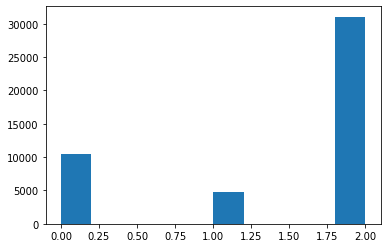

Val data: 



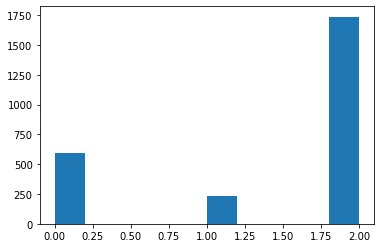

Test data: 



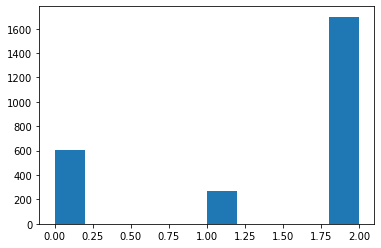

In [14]:
# Splitting 90% train, 10% testing (first float value)
# Splitting testing in half for a final 90-5-5 train test validation (second float val)
train, val, test = split_.split_data(hybrid_label_df, 0.1, .5, 'label')

## Sampling and Balancing the Training Set Only
- Undersample the majority classes (0 and 2) 
- Oversample the minority class (1) 
- End up with a data split of 24,000 training examples, ~2500 Test and ~2500 Validation examples
- Create dictionaries for each Training, Test, and Validation data sets

(array([8000.,    0.,    0.,    0.,    0., 8000.,    0.,    0.,    0.,
        8000.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

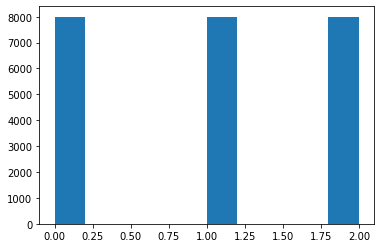

In [11]:
train_zero_samp = train[train['label'] == 0].sample(n = 8000, random_state = 42)
train_one_samp = train[train['label'] == 1].sample(n = 8000, replace = True, random_state = 42)
train_two_samp = train[train['label'] == 2].sample(n = 8000, random_state = 42)
balanced_train = train_zero_samp.append(train_one_samp).append(train_two_samp)

plt.hist(balanced_train.label)

In [ ]:
# Create Training dictionary
train_dict_bal = ld.get_ids(balanced_train, 'label')

# Writing dictionary to text file for training
try:
    id_file = open('train_dict_bal.txt', 'wt')
    id_file.write(str(train_dict_bal))
    id_file.close()
  
except:
    print("Unable to write to file")


In [ ]:
# Create Validation dictionary
val_dict_nobal = ld.get_ids(val, 'label')

# Writing dictionary to text file for validation
try:
    id_file = open('val_dict_nobal.txt', 'wt')
    id_file.write(str(val_dict_nobal))
    id_file.close()
  
except:
    print("Unable to write to file")

In [ ]:
# Create Test dictionary
test_dict_nobal = ld.get_ids(test, 'label')

# Writing dictionary to text file for testing
try:
    id_file = open('test_dict_nobal.txt', 'wt')
    id_file.write(str(test_dict_nobal))
    id_file.close()
  
except:
    print("Unable to write to file")

# Develop Score Dataframe and Dictionaries for Model Inputs 
- This is using the dataframe with clock scores as labels
- Train test split with a 90-5-5 ratio
- Balance training set to end up with close to 80-10-10 ratio split between train, test, validation
- Upsample label class 0 and 1; downsample label classes 2-5
- Create dictionaries of all train, val, test datasets

In [12]:
# Keep desired columns
score_df = nhat_label_df[['spid', "cg1dclkdraw", 'round']]
score_df

,spid,cg1dclkdraw,round
0,10000003,3.0,1
1,10000004,3.0,1
2,10000005,3.0,1
3,10000006,4.0,1
4,10000008,2.0,1
...,...,...,...
51356,20007107,5.0,10
51357,20007109,4.0,10
51358,20007110,5.0,10
51359,20007111,5.0,10


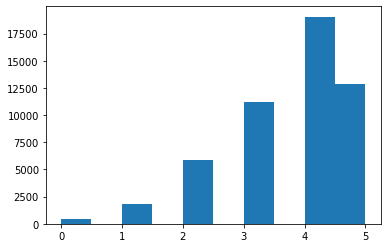

4.0    19046
5.0    12901
3.0    11210
2.0     5905
1.0     1812
0.0      487
Name: cg1dclkdraw, dtype: int64

In [13]:
plt.hist(score_df['cg1dclkdraw'])
plt.show()
score_df['cg1dclkdraw'].value_counts()

length of training set:  46224
length of validation set:  2569
length of test set:  2568
Total length:  51361
Train data: 



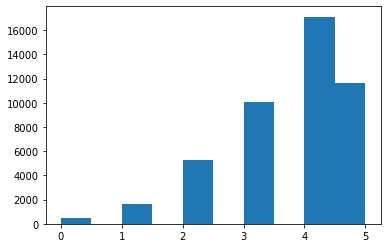

Val data: 



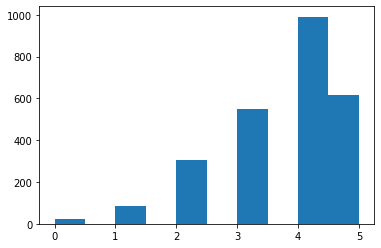

Test data: 



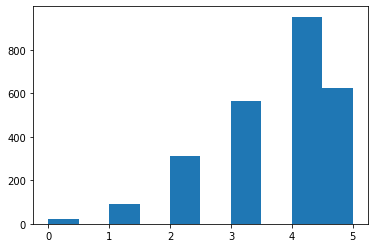

In [15]:
# Get training data, val, test split 
# Return as a dataframe of each before rebalancing the training set. 

train, val, test = split_.split_data(score_df, 0.1, .5, 'cg1dclkdraw')

(array([4000.,    0., 4000.,    0., 4000.,    0., 4000.,    0., 4000.,
        4000.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

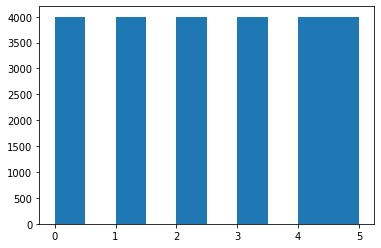

In [16]:
# Balancing the training dataset by upsampling the labels 0 and 1
# Downsampling labels 2-5

train_zero_samp = train[train['cg1dclkdraw'] == 0.].sample(n = 4000, replace = True, random_state = 42)
train_one_samp = train[train['cg1dclkdraw'] == 1.].sample(n = 4000, replace = True, random_state = 42)
train_two_samp = train[train['cg1dclkdraw'] == 2.].sample(n = 4000, random_state = 42)
train_thre_samp = train[train['cg1dclkdraw'] == 3.].sample(n = 4000, random_state = 42)
train_fr_samp = train[train['cg1dclkdraw'] == 4.].sample(n = 4000, random_state = 42)
train_fv_samp = train[train['cg1dclkdraw'] == 5.].sample(n = 4000, random_state = 42)
balanced_train = train_zero_samp.append(train_one_samp).append(train_two_samp).append(train_thre_samp).append(train_fr_samp).append(train_fv_samp)

plt.hist(balanced_train.cg1dclkdraw)

In [ ]:
# Create Training dictionary
tr_scor_dict_bal = ld.get_ids(balanced_train, 'cg1dclkdraw')

# Writing dictionary to text file for training
try:
    id_file = open('tr_scor_dict_bal.txt', 'wt')
    id_file.write(str(tr_scor_dict_bal))
    id_file.close()
  
except:
    print("Unable to write to file")

In [ ]:
# Create Validation dictionary
val_scor_dict_nobal = ld.get_ids(val, 'cg1dclkdraw')

# Writing dictionary to text file for Validation
try:
    id_file = open('val_scor_dict_nobal.txt', 'wt')
    id_file.write(str(val_scor_dict_nobal))
    id_file.close()
  
except:
    print("Unable to write to file")

In [ ]:
# Create testing dictionary
tst_scor_dict_nobal = ld.get_ids(test, 'cg1dclkdraw')

# Writing dictionary to text file for testing
try:
    id_file = open('tst_scor_dict_nobal.txt', 'wt')
    id_file.write(str(tst_scor_dict_nobal))
    id_file.close()
  
except:
    print("Unable to write to file")

In [18]:
print('fin')

fin
